In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from IPython.display import clear_output
import PIL as pl
import random
import pickle
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub

In [2]:
from tensorflow.keras.utils import Sequence
import numpy as np   

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y

In [3]:
# model = hub.KerasLayer("https://tfhub.dev/adityakane2001/regnety600mf_feature_extractor/1")

In [4]:
train_path = "./Train/"

In [5]:
types = np.load("dict.npy", allow_pickle = True).tolist()

In [6]:
data = pd.read_csv("train.csv")

Arreglamos las iguanas

In [7]:
data[data["Id"] == "image_4084.jpg"]["Expected"].index.values[0]

3064

In [8]:
data[data["Id"] == "image_4152.jpg"]["Expected"].index.values[0]

3112

In [9]:
data.iloc[data[data["Id"] == "image_4084.jpg"]["Expected"].index.values[0], 1] = "1 8"
data.iloc[data[data["Id"] == "image_4152.jpg"]["Expected"].index.values[0], 1] = "3 29"

In [10]:
data[data["Id"] == "image_4084.jpg"]["Expected"]

3064    1 8
Name: Expected, dtype: object

In [11]:
data[data["Id"] == "image_4152.jpg"]["Expected"]

3112    3 29
Name: Expected, dtype: object

In [12]:
data.iloc[3078]

Id          image_4102.jpg
Expected              4 33
Name: 3078, dtype: object

In [13]:
data = data.drop(data[data["Id"] == "image_4102.jpg"]["Expected"].index.values[0]).drop(data[data["Id"] == "image_4101.jpg"]["Expected"].index.values[0])

Arreglamos los sapos

In [14]:
data[data["Id"] == "image_404.jpg"]["Expected"] #salamandra

297    0 7
Name: Expected, dtype: object

In [15]:
data[data["Id"] == "image_341.jpg"]["Expected"] #mariposa

247    0 7
Name: Expected, dtype: object

In [16]:
data[data["Id"] == "image_294.jpg"]["Expected"] #mariposa

214    0 7
Name: Expected, dtype: object

In [17]:
data[data["Id"] == "image_473.jpg"]["Expected"] #cangrejo

345    0 7
Name: Expected, dtype: object

In [18]:
data.iloc[data[data["Id"] == "image_404.jpg"]["Expected"].index.values[0], 1] = "0 6"
data.iloc[data[data["Id"] == "image_341.jpg"]["Expected"].index.values[0], 1] = "1 9"
data.iloc[data[data["Id"] == "image_294.jpg"]["Expected"].index.values[0], 1] = "1 9"

In [19]:
data = data.drop(data[data["Id"] == "image_473.jpg"]["Expected"].index.values[0]).reset_index().drop("index", axis = 1)

In [20]:
data["tipo"] = data["Expected"].apply(lambda x : types[x.split(" ")[0]])

In [21]:
data["animal"] = data["Expected"].apply(lambda x : types[x.split(" ")[1]])

In [22]:
for file in os.listdir(train_path):
    if "jpeg" in file and "." not in file:
        new = file.replace("jpeg", ".jpeg")
        print(f"Changing : {file} to {new}")
        os.rename(train_path + file, train_path + file.replace("jpeg", ".jpeg"))

In [23]:
def change(x):
    if "jpeg" in x and "." not in x:
        return x.replace("jpeg", ".jpeg")
    return x

In [24]:
data["Id"] = data["Id"].apply(lambda x : change(x))

In [25]:
data = data.drop(data[data["Id"] == "image_2700.jpg"].index.values[0])

In [26]:
data = data.reset_index().drop("index", axis = 1)

In [27]:
l = data.values.tolist()

In [28]:
random.shuffle(l)

In [29]:
data = pd.DataFrame(l, columns = ["Id", "Expected", "tipo", "animal"])

In [30]:
del l

In [31]:
shape_size = (224, 224)
size = len(data)

In [32]:
list_of_images = []
for i, file in enumerate(data["Id"]):
    
    print(f"Loading {i + 1} file of {size}")
    clear_output(wait = True)
    
    image = pl.Image.open(train_path + file).resize(shape_size)
    list_of_images.append(image)

Loading 3518 file of 3518


In [33]:
Images = np.zeros((len(data), shape_size[0], shape_size[1], 3), dtype = np.float32)

In [34]:
for i, image in enumerate(list_of_images):
    print(f"Loading {i + 1} file of {size}")
    clear_output(wait = True)
    
    try:
        array = np.asarray(image) / 255
        Images[i] = array
    except:
        array = (np.asarray(image).T[0 : 3] / 255).T
        Images[i] = array

Loading 3518 file of 3518


In [35]:
del list_of_images

In [36]:
# file = open("data_loaded.obj", "wb")
# pickle.dump(Images, file)
# file.close()

In [37]:
# file = open("data_loaded.obj", "rb")
# Images = pickle.load(Images, file)
# file.close()

In [38]:
Images.shape[1 : ]

(224, 224, 3)

In [39]:
data["animal"].unique()

array(['Serpiente', 'Cisne', 'Buho', 'Mariposa', 'Cacique', 'Cabra',
       'Lagarto', 'Pavo', 'Paloma', 'Viuda negra', 'Ganso', 'Cormoran',
       'Pato', 'Perro', 'Conejo', 'Rana', 'Tortuga', 'Tarantula',
       'Cocodrilo', 'Iguana', 'Gato', 'Saltamontes', 'Salamandra',
       'Tigre', 'Caballo', 'Lobo', 'Leon', 'Camaleon', 'Lombriz',
       'Elefante', 'Sapo', 'Oso'], dtype=object)

In [40]:
for col in data["animal"].unique():
    data[col] = data["animal"].apply(lambda x : int(x == col))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(Images, data[data["animal"].unique()], stratify = data[data["animal"].unique()])

In [42]:
new_X_train = np.zeros((len(X_train) * 2, 224, 224, 3))

In [43]:
for i in range(len(X_train)):
    new_X_train[i] = X_train[i]

In [44]:
tot = len(y_train.columns)

In [45]:
inputs = tf.keras.Input((224, 224, 3))

rot = tf.keras.layers.RandomRotation(0.5)(inputs)
flip = tf.keras.layers.RandomFlip()(rot)
noise = tf.keras.layers.GaussianNoise(0.05)(flip)
cont = tf.keras.layers.RandomContrast((0.1, 0.1))(noise)

dataAugmentation = tf.keras.Model(inputs = inputs, outputs = cont)

In [46]:
tf.get_logger().setLevel('ERROR')

In [68]:
trained = os.listdir("./Models")

In [69]:
trained = [x.split("_")[0] for x in trained]

In [50]:
os.environ['TFHUB_CACHE_DIR'] = 'C:/Users/gmendez/Documents/Redes neuronales/'

In [74]:
new_col_ = True
for cant, col in enumerate(y_train.columns):
    if col not in trained:
        while True:
            # col = "Sapo"
            hub_model = tf.keras.Sequential([
                hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5", trainable = False)
            ])
            hub_model.build([None, 224, 224, 3])
            # hub_model.trainable = False

            inputs = tf.keras.Input((None, None, 3))

            #Data Augmentation
            aug = dataAugmentation(inputs)

            x = hub_model(aug, training = False)
            
#             conv_1 = tf.keras.layers.Conv2D(2, 3, padding = "same")(aug)
#             pool_1 = tf.keras.layers.AveragePooling2D(padding = "same")(conv_1)
#             drop_1 = tf.keras.layers.Dropout(0.25)(pool_1)
#             batch_1 =  tf.keras.layers.BatchNormalization()(drop_1)
            
#             conv_2 = tf.keras.layers.Conv2D(4, 3, padding = "same")(batch_1)
#             pool_2 = tf.keras.layers.AveragePooling2D(padding = "same")(conv_2)
#             drop_1 = tf.keras.layers.Dropout(0.25)(pool_2)
#             batch_2 =  tf.keras.layers.BatchNormalization()(drop_1)
            
#             conv_3 = tf.keras.layers.Conv2D(8, 3, padding = "same")(batch_2)
#             pool_3 = tf.keras.layers.AveragePooling2D(padding = "same")(conv_3)
#             drop_1 = tf.keras.layers.Dropout(0.25)(pool_3)
#             batch_3 =  tf.keras.layers.BatchNormalization()(drop_1)
            
#             conv_4 = tf.keras.layers.Conv2D(16, 3, padding = "same")(batch_3)
#             pool_4 = tf.keras.layers.AveragePooling2D(padding = "same")(conv_4)
#             drop_1 = tf.keras.layers.Dropout(0.25)(pool_4)
#             batch_4 =  tf.keras.layers.BatchNormalization()(drop_1)
            
#             conv_5 = tf.keras.layers.Conv2D(32, 3, padding = "same")(batch_4)
#             pool_5 = tf.keras.layers.AveragePooling2D(padding = "same")(conv_5)
#             drop_1 = tf.keras.layers.Dropout(0.25)(pool_5)
#             batch_5 =  tf.keras.layers.BatchNormalization()(drop_1)
            
#             conv_6 = tf.keras.layers.Conv2D(64, 3, padding = "same")(batch_5)
#             pool_6 = tf.keras.layers.AveragePooling2D(padding = "same")(conv_6)
#             drop_1 = tf.keras.layers.Dropout(0.25)(pool_6)
#             batch_6 =  tf.keras.layers.BatchNormalization()(drop_1)
            
#             conv_7 = tf.keras.layers.Conv2D(128, 3, padding = "same")(batch_6)
#             pool_7 = tf.keras.layers.AveragePooling2D(padding = "same")(conv_7)
#             drop_1 = tf.keras.layers.Dropout(0.25)(pool_7)
#             batch_7 =  tf.keras.layers.BatchNormalization()(drop_1)
            
#             conv_8 = tf.keras.layers.Conv2D(256, 3, padding = "same")(batch_7)
#             pool_8 = tf.keras.layers.AveragePooling2D(padding = "same")(conv_8)
#             drop_1 = tf.keras.layers.Dropout(0.25)(pool_8)
#             batch_8 =  tf.keras.layers.BatchNormalization()(drop_1)
            
#             flatten = tf.keras.layers.Flatten()(batch_8)
            
            # hidden_2 = tf.keras.layers.Dense(512, activation = "relu")(flatten)
            # hidden_3 = tf.keras.layers.Dense(256, activation = "relu")(hidden_2)
            # hidden_4 = tf.keras.layers.Dense(128, activation = "relu")(hidden_3)
            # hidden_5 = tf.keras.layers.Dense(64, activation = "relu")(hidden_4)
            
            # concat = tf.concat([x, flatten], axis = 1)
            hidden_1 = tf.keras.layers.Dense(254, activation = "relu")(x)
            drop_1 = tf.keras.layers.Dropout(0.25)(hidden_1)
            # batch = tf.keras.layers.BatchNormalization()(hidden_1)
            hidden_2 = tf.keras.layers.Dense(114, activation = "relu")(drop_1)
            drop_1 = tf.keras.layers.Dropout(0.25)(hidden_2)
            hidden_3 = tf.keras.layers.Dense(50, activation = "relu")(drop_1)
            drop_1 = tf.keras.layers.Dropout(0.25)(hidden_3)
            # hidden_4 = tf.keras.layers.Dense(128, activation = "relu")(hidden_3)
            # hidden_5 = tf.keras.layers.Dense(64, activation = "relu")(hidden_4)

            outputs = tf.keras.layers.Dense(1, activation = "sigmoid")(drop_1)

            final_model = tf.keras.Model(inputs = inputs, outputs = outputs)

            final_model.compile(
                optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = tf.keras.metrics.BinaryAccuracy()
            )

            filter_ = y_train[col] == 1
            filtered = X_train[filter_]
            n = len(filtered)
            
            if new_col_:
            
                for i in range(len(X_train), len(X_train) * 2):
                    print(f"Training {col} {cant} of {tot}\nChanging {i + 1} of {len(X_train) * 2}")
                    clear_output(wait = True)
                    aux = tf.keras.preprocessing.image.random_zoom(filtered[i % n], (0.8, 1.5), 0, 1, 2)
                    aux = tf.keras.preprocessing.image.random_channel_shift(aux, 0.2, 2)
                    aux = tf.keras.preprocessing.image.random_rotation(aux, 180, 0, 1, 2)
                    new_X_train[i] = aux
            print(f"Training {col} {cant} of {tot}")
            new_values = y_train[col].values.tolist() + [1 for i in range(len(X_train))]
            train_gen = DataGenerator(new_X_train, np.array([new_values]).T, 16)
            test_gen = DataGenerator(X_test, y_test[[col]], 16)

            final_model.fit(train_gen, validation_data = test_gen, epochs = 500, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)])

            m = tf.keras.metrics.BinaryCrossentropy()
            m.update_state(y_test[[col]].values, final_model.predict(X_test).round())
            cross_entropy = m.result().numpy()
            
            final_model.save(f"./Models/{col}_{cross_entropy}")
            
            print(f"Cross entropy : {cross_entropy}")
            new_col_ = True
            
            break

            # if cross_entropy < 0.065:
            #     final_model.save(f"./Models/{col}_{cross_entropy}")
            #     new_col_ = True
            #     break
            # else:
#                 print("Starting fine tuning")
#                 hub_model.trainable = True
#                 final_model.compile(
#                     optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5),
#                     loss = tf.keras.losses.BinaryCrossentropy(),
#                     metrics = tf.keras.metrics.BinaryAccuracy()
#                 )
                
#                 final_model.fit(train_gen, validation_data = test_gen, epochs = 500, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)])
                
#                 m = tf.keras.metrics.BinaryAccuracy()
#                 m.update_state(y_test[[col]].values, final_model.predict(X_test).round())
#                 accuracy = m.result().numpy()
                
#                 if accuracy > 0.99:
#                     final_model.save(f"./Models/{col}_{accuracy}")
#                     new_col_ = True
#                     break
                # new_col_ = False

Training Sapo 23 of 32
Epoch 1/500
330/330 [==============================] - 44s 115ms/step - loss: 0.8232 - binary_accuracy: 0.5434 - val_loss: 0.7376 - val_binary_accuracy: 0.4841
Epoch 2/500
330/330 [==============================] - 36s 109ms/step - loss: 0.6509 - binary_accuracy: 0.6480 - val_loss: 0.6263 - val_binary_accuracy: 0.6545
Epoch 3/500
330/330 [==============================] - 36s 109ms/step - loss: 0.5242 - binary_accuracy: 0.7371 - val_loss: 0.5299 - val_binary_accuracy: 0.7739
Epoch 4/500
330/330 [==============================] - 36s 109ms/step - loss: 0.4414 - binary_accuracy: 0.7964 - val_loss: 0.4467 - val_binary_accuracy: 0.8545
Epoch 5/500
330/330 [==============================] - 36s 108ms/step - loss: 0.3856 - binary_accuracy: 0.8351 - val_loss: 0.4003 - val_binary_accuracy: 0.8727
Epoch 6/500
330/330 [==============================] - 36s 109ms/step - loss: 0.3326 - binary_accuracy: 0.8647 - val_loss: 0.3632 - val_binary_accuracy: 0.8886
Epoch 7/500
330/3

In [49]:
import keras_tuner as kt

In [50]:
os.environ['TFHUB_CACHE_DIR'] = 'C:/Users/gmendez/Documents/Redes neuronales/'

In [51]:
def build_model(hp):
    model = tf.keras.Sequential()
  
    hp_units1 = hp.Int('units1', min_value = 64, max_value = 512, step = 2)
    hp_units2 = hp.Int('units2', min_value = 32, max_value = 128, step = 2)
    hp_units3 = hp.Int('units3', min_value = 8, max_value = 64, step = 2)
    
    model.add(dataAugmentation)
    
    hub_model = tf.keras.Sequential([
        hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5")
    ])
    hub_model.build([None, 224, 224, 3])
    hub_model.trainable = False
    
    model.add(hub_model)
    model.add(tf.keras.layers.Dense(units = hp_units1, activation = 'relu'))
    model.add(tf.keras.layers.Dense(units = hp_units2, activation = 'relu'))
    model.add(tf.keras.layers.Dense(units = hp_units3, activation = 'relu'))
    
    model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])
    
    model.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate = hp_learning_rate),
        loss = tf.keras.losses.BinaryCrossentropy(),
        metrics = tf.keras.metrics.BinaryAccuracy()
    )
    
    return model

In [52]:
tuner = kt.Hyperband(
    build_model,
    objective = "val_loss",
    max_epochs = 15,
    directory = 'tf_learning_sapo',
    project_name = 'transfer_learning_sapo',
    hyperband_iterations = 20
)

Tuneamos hiperparámetros para las categorías que faltan, aquí los "Sapos"

In [54]:
col = "Sapo"
filter_ = y_train[col] == 1
filtered = X_train[filter_]
n = len(filtered)

for i in range(len(X_train), len(X_train) * 2):
    print(f"Training {col} {i} of {tot}\nChanging {i + 1} of {len(X_train) * 2}")
    clear_output(wait = True)
    aux = tf.keras.preprocessing.image.random_zoom(filtered[i % n], (0.8, 1.5), 0, 1, 2)
    aux = tf.keras.preprocessing.image.random_channel_shift(aux, 0.2, 2)
    aux = tf.keras.preprocessing.image.random_rotation(aux, 180, 0, 1, 2)
    new_X_train[i] = aux

Training Sapo 5275 of 32
Changing 5276 of 5276


In [55]:
new_values = y_train[col].values.tolist() + [1 for i in range(len(X_train))]
train_gen = DataGenerator(new_X_train, np.array([new_values]).T, 32)
test_gen = DataGenerator(X_test, y_test[[col]], 32)

In [57]:
tuner.search(train_gen, epochs=10, validation_data = test_gen, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)])


Search: Running Trial #348

Hyperparameter    |Value             |Best Value So Far 
units1            |486               |254               
units2            |70                |114               
units3            |62                |50                
learning_rate     |0.001             |0.001             
tuner/epochs      |5                 |2                 
tuner/initial_e...|2                 |0                 
tuner/bracket     |2                 |2                 
tuner/round       |1                 |0                 
tuner/trial_id    |531330d332e057d...|None              

Epoch 3/5
  1/165 [..............................] - ETA: 37:46 - loss: 0.4173 - binary_accuracy: 0.8750

ResourceExhaustedError: Graph execution error:

OOM when allocating tensor with shape[32,64,112,112] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node predict/MobilenetV3/expanded_conv_1/expand/BatchNorm/FusedBatchNormV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_5177848]

In [61]:
tuner.get_best_hyperparameters()[0].get("units1")

254

In [62]:
tuner.get_best_hyperparameters()[0].get("units2")

114

In [63]:
tuner.get_best_hyperparameters()[0].get("units3")

50

In [64]:
tuner.get_best_hyperparameters()[0].get("learning_rate")

0.001

In [59]:
final_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 model (Functional)             (None, 224, 224, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv2d_24 (Conv2D)             (None, 224, 224, 2)  56          ['model[3][0]']                  
                                                                                                  
 average_pooling2d_24 (AverageP  (None, 112, 112, 2)  0          ['conv2d_24[0][0]']        

In [81]:
sapos_malos = [70, 29, 59, 62]
for pos in sapos_malos:
    print(data.iloc[y_train[y_train["Sapo"] == 1].reset_index().iloc[pos]["index"]]["Id"])

image_404.jpg
image_341.jpg
image_294.jpg
image_473.jpg


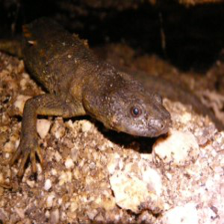

In [77]:
tf.keras.preprocessing.image.array_to_img(X_train[y_train["Sapo"] == 1][70])

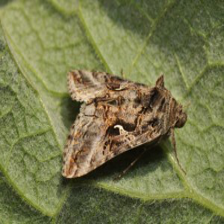

In [69]:
tf.keras.preprocessing.image.array_to_img(X_train[y_train["Sapo"] == 1][29])

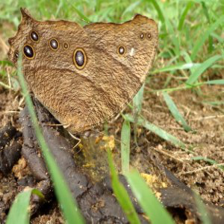

In [72]:
tf.keras.preprocessing.image.array_to_img(X_train[y_train["Sapo"] == 1][59])

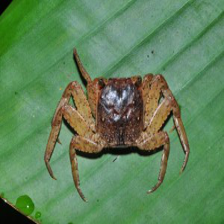

In [74]:
tf.keras.preprocessing.image.array_to_img(X_train[y_train["Sapo"] == 1][62])

In [109]:
iguanas_malas = [13, 29, 32, 58]
for pos in iguanas_malas:
    print(data.iloc[y_train[y_train["Iguana"] == 1].reset_index().iloc[pos]["index"]]["Id"])

image_4084.jpg
image_4152.jpg
image_4102.jpg
image_4101.jpg


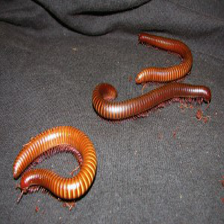

In [ ]:
tf.keras.preprocessing.image.array_to_img(X_train[y_train["Iguana"] == 1][13])

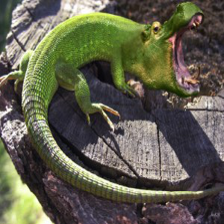

In [ ]:
tf.keras.preprocessing.image.array_to_img(X_train[y_train["Iguana"] == 1][15])

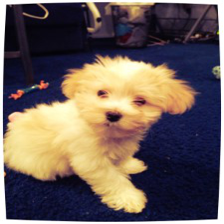

In [ ]:
tf.keras.preprocessing.image.array_to_img(X_train[y_train["Iguana"] == 1][29])

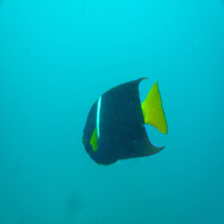

In [81]:
tf.keras.preprocessing.image.array_to_img(X_train[y_train["Iguana"] == 1][32])

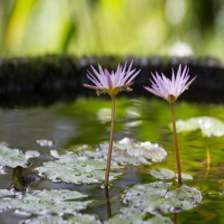

In [83]:
tf.keras.preprocessing.image.array_to_img(X_train[y_train["Iguana"] == 1][54])

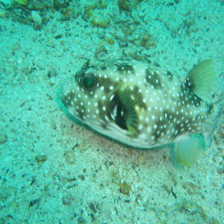

In [85]:
tf.keras.preprocessing.image.array_to_img(X_train[y_train["Iguana"] == 1][58])

In [38]:
final_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 model (Functional)             (None, 224, 224, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv2d_8 (Conv2D)              (None, 224, 224, 32  896         ['model[2][0]']                  
                                )                                                                 
                                                                                            

In [42]:
l_models = os.listdir("./Models")

In [43]:
models = []
tot = len(l_models)
for cant, model in enumerate(l_models):
    print(f"Loading {model.replace('.obj', '')} {cant + 1} of {tot}")
    models.append(tf.keras.models.load_model(f"./Models/{model}"))
    clear_output(wait = True)

Loading Viuda negra_1.0 32 of 32


In [44]:
l_models = [i.split("_")[0] for i in l_models]

In [45]:
for model, name in zip(models, l_models):
    model._name = f"{name}".replace(" ", "")
    for layer in model.layers:
        layer._name = layer.name + name.replace(" ", "").lower()

In [46]:
for model in models:
    model.trainable = False

In [47]:
inverse_types = {}
for key in types:
    inverse_types[types[key]] = key

In [48]:
def get_prediction(prediction):
    return np.argmax(prediction)

In [49]:
inputs = tf.keras.Input((None, None, 3,))
resizing = tf.keras.layers.Resizing(224, 224)(inputs)
rescaling = tf.keras.layers.Rescaling(1/255)(resizing)
concat = tf.concat([m(rescaling, training = False) for m in models], 1)
# outputs = tf.keras.layers.Dense(32, activation = "softmax")(concat)

In [50]:
final_model = tf.keras.Model(inputs = inputs, outputs = concat)

In [51]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 resizing (Resizing)            (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['resizing[0][0]']               
                                                                                                  
 Buho (Functional)              (None, 1)            6181994     ['rescaling[0][0]']          

In [53]:
final_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy()]
)

In [58]:
test = pd.read_csv("train.csv")

In [59]:
get_type = {}
for ave in ["Buho", "Cacique", "Cisne", "Cormoran", "Ganso", "Paloma", "Pato", "Pavo"]:
    get_type[ave] = "Ave"
    
for anfibio in ["Rana", "Salamandra", "Sapo"]:
    get_type[anfibio] = "Anfibio"
    
for artropodo in ["Lombriz", "Mariposa", "Saltamontes", "Tarantula", "Viuda negra"]:
    get_type[artropodo] = "Artropodo"
    
for mamifero in ["Caballo", "Cabra", "Conejo", "Elefante", "Gato", "Leon", "Lobo", "Oso", "Perro", "Tigre"]:
    get_type[mamifero] = "Mamifero"
    
for reptil in ["Camaleon", "Cocodrilo", "Iguana", "Lagarto", "Serpiente", "Tortuga"]:
    get_type[reptil] = "Reptil"

In [83]:
predictions = []

In [84]:
for i, file in enumerate(data["Id"]):
    
    if file == "image_3577.png"or file == "image_2661":
        v = np.asarray(pl.Image.open("./Train/" + file))
        v = np.array([v.tolist(), v.tolist(), v.tolist()]).T
        v = v.reshape((1, v.shape[0], v.shape[1], 3))
        print(v.shape)
        p = final_model.predict(v)
        pred = l_models[get_prediction(p)]
        s = f"{inverse_types[get_type[pred]]} {inverse_types[pred]}"
        predictions.append([file, s])
        clear_output(wait  = True)
        continue
    try:
        print(f"Openning {i} of {len(test)} - {file}")
        v = np.asarray(pl.Image.open("./Train/" + file))
        v = v.reshape((1, v.shape[0], v.shape[1], 3))
        p = final_model.predict(v)
        pred = l_models[get_prediction(p)]
        s = f"{inverse_types[get_type[pred]]} {inverse_types[pred]}"
        predictions.append([file, s])
        clear_output(wait  = True)
    except:
        print(f"Openning {i} of {len(test)} - {file}")
        v = np.asarray(pl.Image.open("./Train/" + file)).T[0 : 3].T
        print(np.asarray(pl.Image.open("./Train/" + file)).shape)
        v = v.reshape((1, v.shape[0], v.shape[1], 3))
        p = final_model.predict(v)
        pred = l_models[get_prediction(p)]
        s = f"{inverse_types[get_type[pred]]} {inverse_types[pred]}"
        predictions.append([file, s])
        clear_output(wait  = True)

Openning 2911 of 3522 - image_2964.jpg
Openning 2911 of 3522 - image_2964.jpg
(4016, 5356, 3)


ResourceExhaustedError: Graph execution error:

Detected at node 'model/Cast' defined at (most recent call last):
    File "C:\Users\gmendez\.conda\envs\redes\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\gmendez\.conda\envs\redes\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\gmendez\.conda\envs\redes\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\gmendez\.conda\envs\redes\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\gmendez\.conda\envs\redes\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\IPython\core\interactiveshell.py", line 2880, in run_cell
      result = self._run_cell(
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\IPython\core\interactiveshell.py", line 2935, in _run_cell
      return runner(coro)
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\IPython\core\interactiveshell.py", line 3134, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\IPython\core\interactiveshell.py", line 3337, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\gmendez\AppData\Local\Temp\ipykernel_2648\1661296431.py", line 6, in <cell line: 1>
      p = final_model.predict(v)
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\keras\engine\training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\keras\engine\training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\keras\engine\training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\keras\engine\training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
      return self(x, training=False)
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\keras\engine\functional.py", line 578, in _run_internal_graph
      y = self._conform_to_reference_input(y, ref_input=x)
    File "C:\Users\gmendez\.conda\envs\redes\lib\site-packages\keras\engine\functional.py", line 678, in _conform_to_reference_input
      tensor = tf.cast(tensor, dtype=ref_input.dtype)
Node: 'model/Cast'
failed to allocate memory
	 [[{{node model/Cast}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_predict_function_1183969]

In [78]:
pd.DataFrame(predictions, columns = ["Id", "Expected"]).to_csv("sexto_intento.csv", index = False)

In [84]:
final_model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy()
)

In [92]:
s2 = pd.read_csv("segundo_intento.csv")

In [93]:
s6 = pd.read_csv("sexto_intento.csv")

In [99]:
s = s2

In [100]:
s["s2"] = s2["Expected"]
s["s6"] = s6["Expected"]

In [104]:
errores = s[s["s2"] != s["s6"]]

s2 : Mariposa, s6 : Tigre


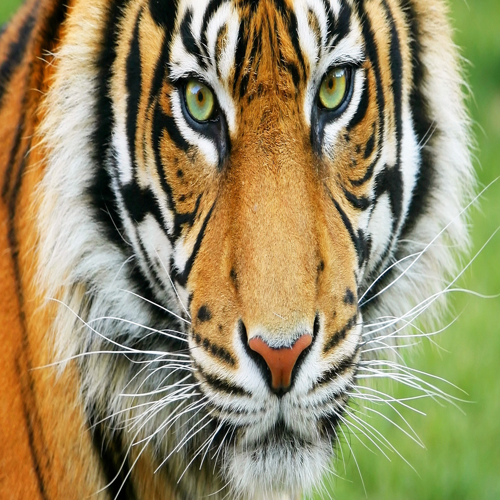

KeyboardInterrupt: Interrupted by user

In [114]:
for file in errores["Id"]:
    x = s[s['Id'] == file]
    print(f"s2 : {types[x['s2'].values[0].split(' ')[1]]}, s6 : {types[x['s6'].values[0].split(' ')[1]]}")
    display(pl.Image.open("./Test/" + file).resize((500, 500)))
    input()
    clear_output(True)